In [1]:
# 自动编码器(AutoEncoder)是一种可以进行无监督学习的神经网络模型，一般而言，一个完整的
# 自动编码器器主要由两部分组成，用于核心特征提取的编码部分和可以实现数据重构的解码部分
# 自动编码器模型的最大用途是实现数据的清洗，如去除噪声数据、对某些输入特征进行增强和放大

torch.Size([64, 1, 28, 28])


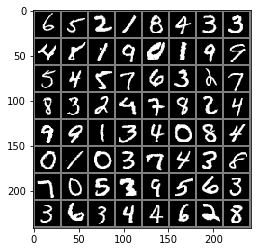

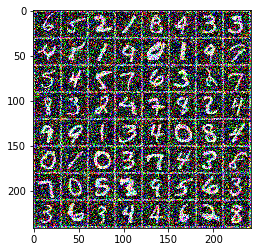

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
  )
)
Epoch0/10
----------
Loss is:0.0031
Epoch1/10
----------
Loss is:0.0018
Epoch2/10
----------
Loss is:0.0016
Epoch3/10
----------
Loss is:0.0015
Epoch4/10
----------
Loss is:0.0014
Epoch5/10
----------
Loss is:0.0013
Epoch6/10
----------
Loss is:0.0013
Epoch7/10
----------
Loss is:0.0013
Epoch8/10
----------
Loss is:0.0012
Epoch9/10
----------
Loss is:0.0012


In [18]:
# 神经网络进行自动编码器
import torch
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(
                        mean=[0.5], std=[0.5])])

data_train = datasets.MNIST(root="./data", transform=transform,
                           train = True, download=True)
data_test = datasets.MNIST(root="./data", transform=transform, train=False)
train_load = torch.utils.data.DataLoader(dataset=data_train, batch_size=64,
                                        shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=data_test, batch_size=64,
                                       shuffle=True)

images, labels = next(iter(train_load))
print(images.shape)
images_example = torchvision.utils.make_grid(images)
images_example = images_example.numpy().transpose(1,2,0)
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
images_example = images_example*std + mean
plt.imshow(images_example)
plt.show()
noisy_images = images_example + 0.5*np.random.randn(*images_example.shape)
noisy_images = np.clip(noisy_images, 0., 1)
plt.imshow(noisy_images)
plt.show()

class AutoEncoder(torch.nn.Module):
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU()
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28*28)
        )
        
    def forward(self, input):
        output = self.encoder(input)
        output = self.decoder(output)
        return output
    
model = AutoEncoder()
print(model)

optimizer = torch.optim.Adam(model.parameters())
loss_f = torch.nn.MSELoss()

epoch_n = 10
for epoch in range(epoch_n):
    running_loss = 0.0
    print("Epoch{}/{}".format(epoch, epoch_n))
    print("-"*10)
    
    for data in train_load:
        X_train, _ = data
        noisy_X_train = X_train + 0.5*torch.randn(X_train.shape)
        noisy_X_train = torch.clamp(noisy_X_train, 0., 1)
        X_train, noisy_X_train = Variable(X_train.view(-1,28*28)), \
                Variable(noisy_X_train.view(-1,28*28))
        train_pre = model(noisy_X_train)
        loss = loss_f(train_pre, X_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data
    
    cal = torch.true_divide
    print("Loss is:{:.4f}".format(cal(running_loss, len(data_train))))
    

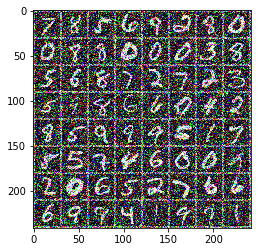

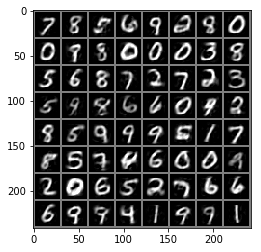

In [28]:
# 测试数据对比结果
X_test, _ = next(iter(test_load))
img1 = torchvision.utils.make_grid(X_test)
img1 = img1.numpy().transpose(1,2,0)
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
img1 = img1*std + mean

noisy_X_test = img1 + 0.5*np.random.randn(*img1.shape)
noisy_X_test = np.clip(noisy_X_test, 0., 1)
plt.figure()
plt.imshow(noisy_X_test)

img2 = X_test + 0.5*torch.randn(X_test.shape)
img2 = torch.clamp(img2, 0., 1)
img2 = Variable(img2.view(-1,28*28))

test_pre = model(img2)
img2 = test_pre.data.view(-1,1,28,28)
img2 = torchvision.utils.make_grid(img2)
img2 = img2.numpy().transpose(1,2,0)
img2 = img2*std + mean
img2 = np.clip(img2, 0., 1)
plt.figure()
plt.imshow(img2)

torch.Size([64, 1, 28, 28])


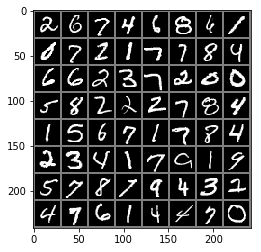

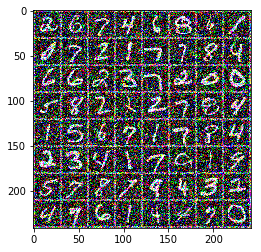

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): Upsample(scale_factor=2.0, mode=nearest)
    (1): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): Upsample(scale_factor=2.0, mode=nearest)
    (4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)
Epoch0/5
----------
Loss is:0.0009
Epoch1/5
----------
Loss is:0.0005
Epoch2/5
----------
Loss is:0.0004
Epoch3/5
----------
Loss is:0.0004
Epoch4/5
----------
Loss is:0.0004


In [31]:
# 使用卷积神经网络实现自动编码器
# 神经网络进行自动编码器
import torch
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(
                        mean=[0.5], std=[0.5])])

data_train = datasets.MNIST(root="./data", transform=transform,
                           train = True, download=True)
data_test = datasets.MNIST(root="./data", transform=transform, train=False)
train_load = torch.utils.data.DataLoader(dataset=data_train, batch_size=64,
                                        shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=data_test, batch_size=64,
                                       shuffle=True)

images, labels = next(iter(train_load))
print(images.shape)
images_example = torchvision.utils.make_grid(images)
images_example = images_example.numpy().transpose(1,2,0)
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
images_example = images_example*std + mean
plt.imshow(images_example)
plt.show()
noisy_images = images_example + 0.5*np.random.randn(*images_example.shape)
noisy_images = np.clip(noisy_images, 0., 1)
plt.imshow(noisy_images)
plt.show()

class AutoEncoder(torch.nn.Module):
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Upsample(scale_factor=2, mode="nearest"),
            torch.nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Upsample(scale_factor=2, mode="nearest"),
            torch.nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
        )
        
    def forward(self, input):
        output = self.encoder(input)
        output = self.decoder(output)
        return output
    
model = AutoEncoder()
print(model)

optimizer = torch.optim.Adam(model.parameters())
loss_f = torch.nn.MSELoss()

epoch_n = 5
for epoch in range(epoch_n):
    running_loss = 0.0
    print("Epoch{}/{}".format(epoch, epoch_n))
    print("-"*10)
    
    for data in train_load:
        X_train, _ = data
        noisy_X_train = X_train + 0.5*torch.randn(X_train.shape)
        noisy_X_train = torch.clamp(noisy_X_train, 0., 1)
        X_train, noisy_X_train = Variable(X_train),Variable(noisy_X_train)
        train_pre = model(noisy_X_train)
        loss = loss_f(train_pre, X_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data
    
    cal = torch.true_divide
    print("Loss is:{:.4f}".format(cal(running_loss, len(data_train))))
    

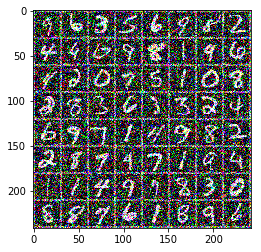

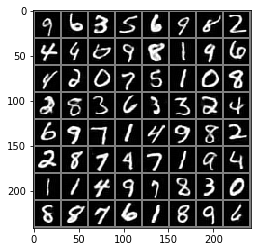

In [32]:
# 测试数据对比结果
X_test, _ = next(iter(test_load))
img1 = torchvision.utils.make_grid(X_test)
img1 = img1.numpy().transpose(1,2,0)
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
img1 = img1*std + mean

noisy_X_test = img1 + 0.5*np.random.randn(*img1.shape)
noisy_X_test = np.clip(noisy_X_test, 0., 1)
plt.figure()
plt.imshow(noisy_X_test)

img2 = X_test + 0.5*torch.randn(X_test.shape)
img2 = torch.clamp(img2, 0., 1)
img2 = Variable(img2)

test_pre = model(img2)
img2 = test_pre.data.view(-1,1,28,28)
img2 = torchvision.utils.make_grid(img2)
img2 = img2.numpy().transpose(1,2,0)
img2 = img2*std + mean
img2 = np.clip(img2, 0., 1)
plt.figure()
plt.imshow(img2)